### Importing packages

In [21]:
import numpy as np
import keras as kr
import pandas as pd

### Loading Iris Dataset 

In [22]:
iris = pd.read_csv("Iris (1).csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing

In [23]:
# The inputs are four floats: sepal length, sepal width, petal length, petal width.
inputs  = np.array(iris)[:,:4].astype(np.float)

# Outputs are initially individual strings: setosa, versicolor or virginica.
outputs = np.array(iris)[:,4]

# Convert the output strings to ints.
outputs_vals, outputs_ints = np.unique(outputs, return_inverse=True)

In [24]:
# Encode the category integers as binary categorical vairables.
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

outputs_cats = iris.Species
outputs_cats = one_hot_encoder.fit_transform(np.array(outputs_cats).reshape(-1, 1))
outputs_cats[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Splitting the dataset

In [25]:
# Split the input and output data sets into training and test subsets.
inds = np.random.permutation(len(inputs))
train_inds, test_inds = np.array_split(inds, 2)
inputs_train, outputs_train = inputs[train_inds], outputs_cats[train_inds]
inputs_test,  outputs_test  = inputs[test_inds],  outputs_cats[test_inds]

### Creating Neural Network

In [26]:
# Create a neural network.
model = kr.models.Sequential()

# Add an initial layer with 4 input nodes, and a hidden layer with 16 nodes.
model.add(kr.layers.Dense(16, input_shape=(4,)))
# Apply the sigmoid activation function to that layer.
model.add(kr.layers.Activation("sigmoid"))
# Add another layer, connected to the layer with 16 nodes, containing three output nodes.
model.add(kr.layers.Dense(3))
# Use the softmax activation function there.
model.add(kr.layers.Activation("softmax"))

In [27]:
# Display our Model using the summary function
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


### Fitting the model 

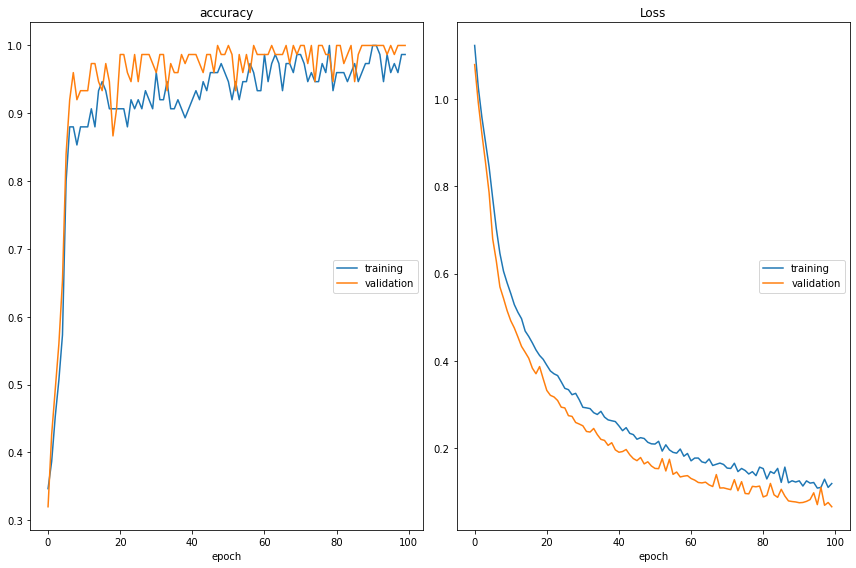

accuracy
	training         	 (min:    0.347, max:    1.000, cur:    0.987)
	validation       	 (min:    0.320, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.109, max:    1.122, cur:    0.119)
	validation       	 (min:    0.066, max:    1.078, cur:    0.066)


In [28]:
# Configure the model for training.
# Uses the adam optimizer and categorical cross entropy as the loss function.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

from livelossplot import PlotLossesKeras

# Fit the model and plotting the training and validation data for each epoch value.
model.fit(inputs_train, outputs_train, epochs=100,validation_data=(inputs_test, outputs_test),
          callbacks=[PlotLossesKeras()], batch_size=1, verbose=1)

### Evaluation of the model

In [29]:
# Evaluate the model using the train data set.
loss_train, accuracy_train = model.evaluate(inputs_train, outputs_train, verbose=1)

# Output the accuracy of the model.
print("\n\nLoss of train set: %6.4f\tAccuracy of train set: %6.4f" % (loss_train, accuracy_train))

3/3 [==============================] - 1s 4ms/step - loss: 0.0974 - accuracy: 1.0000


Loss of train set: 0.0974	Accuracy of train set: 1.0000


In [30]:
# Evaluate the model using the test data set.
loss_test, accuracy_test = model.evaluate(inputs_test, outputs_test, verbose=1)

# Output the accuracy of the model.
print("\n\nLoss of test set: %6.4f\tAccuracy of test set: %6.4f" % (loss_test, accuracy_test))

3/3 [==============================] - 0s 4ms/step - loss: 0.0660 - accuracy: 1.0000


Loss of test set: 0.0660	Accuracy of test set: 1.0000
